# Boosting model

### 1) Reading of the processed dataset

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

X_train = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/raw/diabete.csv")

y_test = list(y_test["Outcome"])
y_train = list(y_train["Outcome"])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106,56,27,165,29.0,0.426,22
1,1,89,66,23,94,28.1,0.167,21
2,1,116,78,29,180,36.1,0.496,25
3,6,115,60,39,125,33.7,0.245,40
4,5,136,82,29,125,32.3,0.640,69


### 2) Model initialisation and training (Without hyperparameters)

In [79]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 71)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=71, ...)

### 3) Model prediction

In [80]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7337662337662337

### 4) Save the model (Without hyperparameters)

In [82]:
model.save_model("/workspaces/ML-Boosting-PilarZarco/models/Boosting_default_71.json")

### 5) Model initialisation and training (With hyperparameters)

In [83]:
from sklearn.metrics import accuracy_score  
from xgboost import XGBClassifier

# Definition of hyperparameter search space:
hyperparams = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

### 6) Model prediction

In [84]:
# Predictions in the test set and training set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Print predictions
print(y_pred_test)
print(y_pred_train)

[0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 0 0 

In [85]:
# Calculate the accuracy in the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate the accuracy in the training set
accuracy_train =accuracy_score(y_train, y_pred_train)

print("Accuracy Test:", accuracy_test, "\nAccuracy Train:", accuracy_train)

Accuracy Test: 0.7337662337662337 
Accuracy Train: 1.0


In [86]:
# Obtain the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

# Hide warnings to keep the code clean
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Perform grid search
grid.fit(X_train, y_train)

# Obtain the best hyperparameters found
best_hyperparams = grid.best_params_

# Prints the best combination of hyperparameters 
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [87]:
# Create a DataFrame with the search results in a grid
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021142,0.004047,0.002536,0.000083,0.8,0,0.01,3,50,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.699187,0.723577,0.674797,0.707317,0.713115,0.703599,0.016447,308
1,0.017692,0.002146,0.002760,0.000372,0.8,0,0.01,3,50,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.691057,0.731707,0.666667,0.707317,0.704918,0.700333,0.021324,319
2,0.034627,0.006768,0.003740,0.001583,0.8,0,0.01,3,100,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.764228,0.837398,0.723577,0.739837,0.754098,0.763828,0.039251,92
3,0.030849,0.002852,0.002988,0.000524,0.8,0,0.01,3,100,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.772358,0.821138,0.707317,0.764228,0.770492,0.767106,0.036170,52
4,0.059852,0.003202,0.005110,0.002829,0.8,0,0.01,3,200,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.764228,0.804878,0.707317,0.764228,0.786885,0.765507,0.032853,63


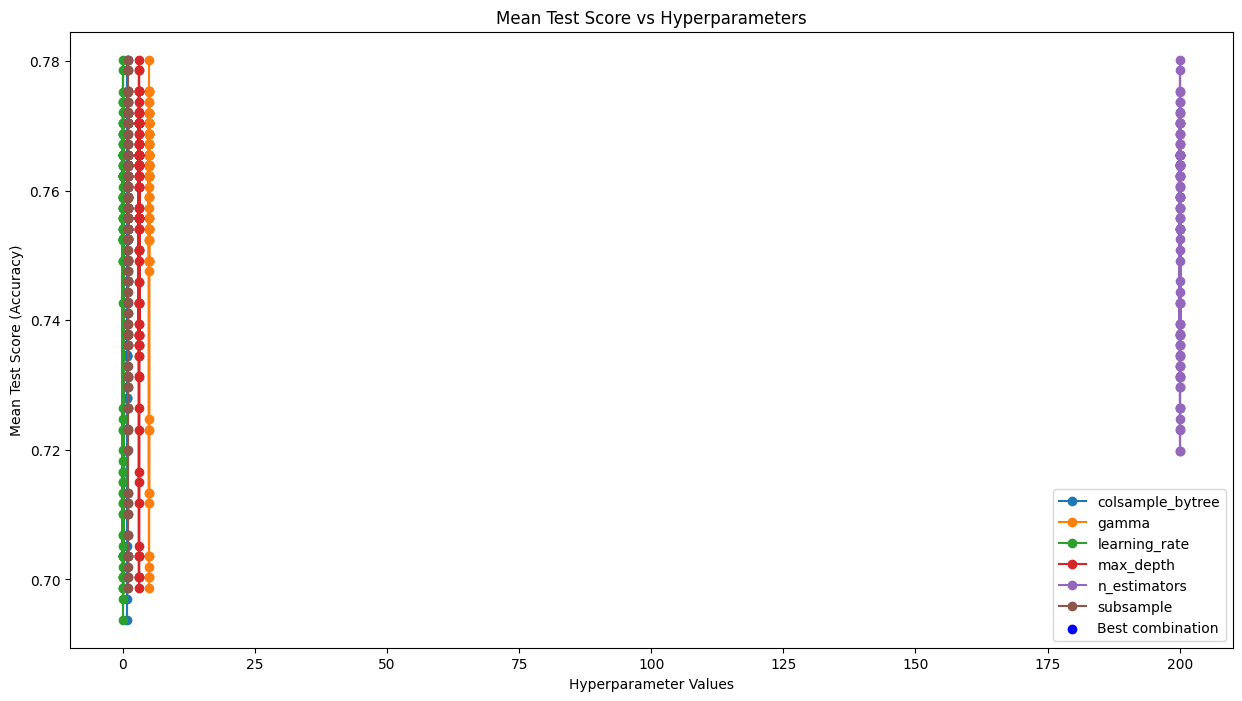

In [91]:
# Create a single graph
fig, ax = plt.subplots(figsize=(15, 8))

hyperparams_to_plot = list(best_hyperparams.keys())

for param_to_plot in hyperparams_to_plot:
    # Check if expected column exists in cv_results
    if f'param_{param_to_plot}' in cv_results.columns:
        param_results = cv_results[cv_results[f'param_{param_to_plot}'] == best_hyperparams[param_to_plot]]

        # Plot results only if there is data for the hyperparameter
        if not param_results.empty:
            ax.plot(param_results[f'param_{param_to_plot}'], param_results['mean_test_score'], marker='o', label=f'{param_to_plot}')

# Marking the best combination
ax.scatter(best_hyperparams[param_to_plot], grid.best_score_, color='blue', label='Best combination')

ax.set_title('Mean Test Score vs Hyperparameters')
ax.set_xlabel('Hyperparameter Values')
ax.set_ylabel('Mean Test Score (Accuracy)')
ax.legend()

plt.show()


### 7) Save the model (With hyperparameters)

In [90]:
model.save_model("/workspaces/ML-Boosting-PilarZarco/models/xgb_regressor_71.json")

### 8) Analyse and compare the results of the models

#### - Accuracy Decision tree model
* Accuracy without optimising 0.7077922077922078
* Accuracy optimised 0.7207792207792207

Slightly improved after optimisation.
May be a suitable option if simplicity and interpretability of the model are valued.
It is the easiest model to understand and explain, and has reasonable accuracy. However, it may not be the best suited to capture the complexity and non-linearity of the data.

#### - Accuracy Random forest model
* Accuracy Test: 0.7987012987012987 
* Accuracy Train: 0.8485342019543974

Performs well on both test set and training set.
Less prone to overfitting compared to the boosting model.
Good choice if looking for a balance between performance and robustness.
It is the model that has the highest accuracy in both the test and training sets, and is less prone to overfitting than the boosting model. In addition, it can handle categorical and missing features better than the boosting model.

#### - Accuracy Boosting model
* Accuracy Test: 0.7337662337662337 
* Accuracy Train: 1.0

Shows overfitting in the training set. Is not able to adapt to the variability of the data.
It is the model that has the highest accuracy on the training set, but it also shows signs of overfitting. This means that it over-fits the training data and does not generalise well to new data. It is also the most complex and difficult model to interpret, and requires more hyperparameter tuning.